In [211]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
pd.set_option('display.max_columns', None)

In [214]:
credit_df = pd.read_csv('/content/drive/MyDrive/머신러닝 프로젝트/data/credit.csv')

In [215]:
credit_df.head()

,ID,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.494089,Good
1,0x160e,CUS_0x21b1,Rick Rothackerj,28_,004-07-5839,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4,2.0,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.690627,Standard
2,0x161a,CUS_0x2dbc,Langep,34,486-85-3974,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,3.0,1303.01,28.616735,17 Years and 9 Months,No,246.992320,168.4137027,!@9#%8,1043.315978,Good
3,0x1626,CUS_0xb891,Jasond,54,072-31-6145,Entrepreneur,30689.89,2,5,4,1,Not Specified,0,6,4.0,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.22885871,Low_spent_Large_value_payments,433.604773,Standard
4,0x1632,CUS_0x1cdb,Deepaa,21,615-06-7821,Developer,35547.71_,7,5,5,0,NaN,5,NaN,4.0,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.7253943,!@9#%8,288.605522,Standard


In [216]:
credit_df.shape

(12500, 24)



*   ID: 고객 고유 식별자
*   Customer_ID: 고객 식별자
*   Name: 고객의 이름
*   Age: 고객의 나이
*   SSN: 사회보장번호
*   Occupation: 고객의 직업
*   Annual_Income: 고객의 연 소득
*   Num_Bank_Accounts: 고객이 보유한 은행 계좌 수
*   Num_Credit_Card: 고객이 보유한 신용카드 수
*   Interest_Rate: 적용되는 이자율
*   Num_of_Loan: 고객이 보유한 대출 수
*   Type_of_Loan: 대출 유형
*   Delay_from_due_date: 평균 연체 일수
*   Num_of_Delayed_Payment: 연체 횟수
*   Num_Credit_Inquiries: 최근 신용 조회 수
*   Outstanding_Debt: 미지불 부채 금액
*   Credit_Utilization_Ratio: 신용 사용 비율
*   Credit_History_Age: 신용 기록의 연령
*   Payment_of_Min_Amount: 최소 금액 지불 여부 ('Yes' / 'No')
*   Total_EMI_per_month: 매월 지불하는 EMI 금액
*   Amount_invested_monthly: 매월 투자되는 금액
*   Payment_Behaviour: 고객의 지불 행동 패턴
*   Monthly_Balance: 매월 잔액 정보
*   Credit_Score: 고객의 신용 점수


In [217]:
credit_df.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis = 1, inplace=True)

In [218]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  object 
 1   Occupation                12500 non-null  object 
 2   Annual_Income             12500 non-null  object 
 3   Num_Bank_Accounts         12500 non-null  int64  
 4   Num_Credit_Card           12500 non-null  int64  
 5   Interest_Rate             12500 non-null  int64  
 6   Num_of_Loan               12500 non-null  object 
 7   Type_of_Loan              11074 non-null  object 
 8   Delay_from_due_date       12500 non-null  int64  
 9   Num_of_Delayed_Payment    11657 non-null  object 
 10  Num_Credit_Inquiries      12264 non-null  float64
 11  Outstanding_Debt          12500 non-null  object 
 12  Credit_Utilization_Ratio  12500 non-null  float64
 13  Credit_History_Age        11387 non-null  object 
 14  Paymen

In [219]:
credit_df['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,6943
Poor,3582
Good,1975


In [220]:
pd.set_option('future.no_silent_downcasting', True)
credit_df['Credit_Score'] = credit_df['Credit_Score'].replace({'Poor':0, 'Standard':1, 'Good':2}).astype(int)

In [221]:
credit_df.describe()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Score
count,12500.000000,12500.000000,12500.00000,12500.000000,12264.000000,12500.000000,12500.000000,12366.000000,12500.000000
mean,17.275120,21.647680,69.46520,21.051440,24.591650,32.291949,1303.781040,405.815391,0.871440
std,118.518214,123.789969,455.95698,14.859994,183.422458,5.084327,8118.261086,218.136964,0.654268
min,0.000000,1.000000,1.00000,-5.000000,0.000000,20.992914,0.000000,0.088628,0.000000
25%,3.000000,4.000000,8.00000,10.000000,2.000000,28.110034,29.128806,271.785749,0.000000
50%,6.000000,5.000000,13.00000,18.000000,4.000000,32.297912,66.372879,337.169588,1.000000
75%,7.000000,7.000000,20.00000,28.000000,8.000000,36.458660,149.904496,475.222487,1.000000
max,1779.000000,1479.000000,5788.00000,67.000000,2592.000000,49.564519,82122.000000,1602.040519,2.000000


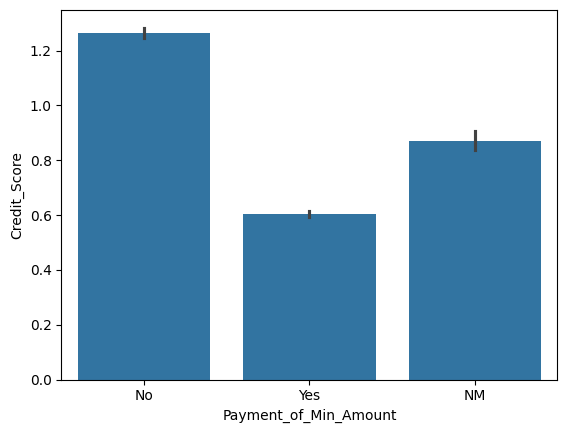

In [222]:
sns.barplot(x='Payment_of_Min_Amount', y='Credit_Score', data=credit_df)
plt.show()

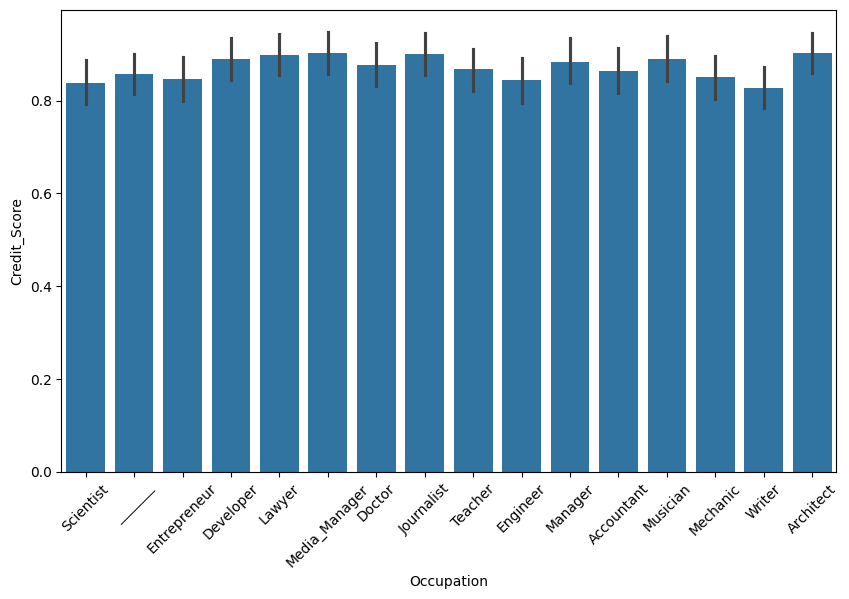

In [223]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation', y='Credit_Score', data=credit_df)
plt.xticks(rotation=45)
plt.show()

In [224]:
obj_cols = credit_df.select_dtypes(include='object').columns

In [225]:
int_cols = credit_df.select_dtypes(include=['int', 'float']).columns

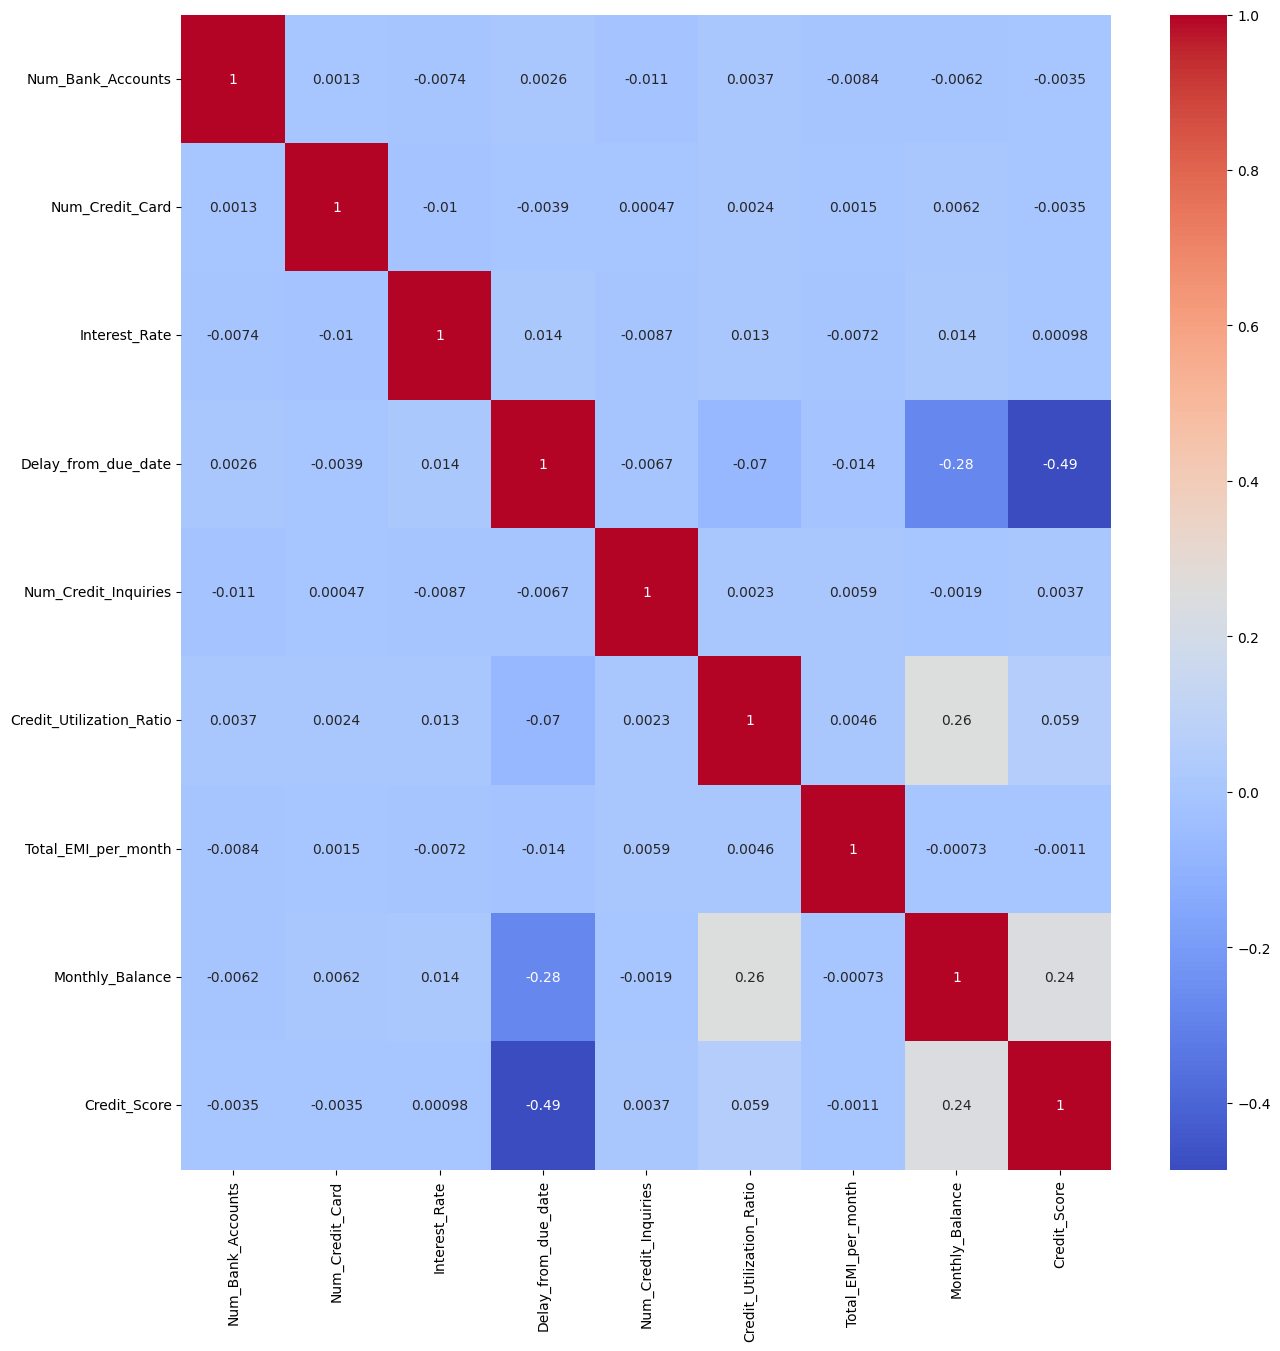

In [226]:
plt.figure(figsize=(15, 15))
sns.heatmap(credit_df[int_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

## Data Cleaning

In [227]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  object 
 1   Occupation                12500 non-null  object 
 2   Annual_Income             12500 non-null  object 
 3   Num_Bank_Accounts         12500 non-null  int64  
 4   Num_Credit_Card           12500 non-null  int64  
 5   Interest_Rate             12500 non-null  int64  
 6   Num_of_Loan               12500 non-null  object 
 7   Type_of_Loan              11074 non-null  object 
 8   Delay_from_due_date       12500 non-null  int64  
 9   Num_of_Delayed_Payment    11657 non-null  object 
 10  Num_Credit_Inquiries      12264 non-null  float64
 11  Outstanding_Debt          12500 non-null  object 
 12  Credit_Utilization_Ratio  12500 non-null  float64
 13  Credit_History_Age        11387 non-null  object 
 14  Paymen

In [228]:
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.494089,2
1,28_,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4,2.0,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.690627,1
2,34,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,3.0,1303.01,28.616735,17 Years and 9 Months,No,246.992320,168.4137027,!@9#%8,1043.315978,2
3,54,Entrepreneur,30689.89,2,5,4,1,Not Specified,0,6,4.0,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.22885871,Low_spent_Large_value_payments,433.604773,1
4,21,Developer,35547.71_,7,5,5,0,NaN,5,NaN,4.0,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.7253943,!@9#%8,288.605522,1


In [229]:
obj_cols = credit_df.select_dtypes(include='object').columns

In [230]:
obj = ['Occupation', 'Type_of_Loan', 'Credit_History_Age', 'Payment_of_Min_Amount','Payment_Behaviour']

In [231]:
trans_cols = [x for x in obj_cols if x not in obj]

In [232]:
trans_cols

['Age',
 'Annual_Income',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Outstanding_Debt',
 'Amount_invested_monthly']

In [233]:
'text_'.replace('_', '')

'text'

In [234]:
for col in trans_cols:
  credit_df[col] = credit_df[col].str.replace('_', ' ')
  credit_df[col] = credit_df[col].astype('float')

In [235]:
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,28.0,_______,34847.84,2,4,6,1.0,Credit-Builder Loan,3,4.0,2.0,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1
2,34.0,_______,143162.64,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",5,8.0,3.0,1303.01,28.616735,17 Years and 9 Months,No,246.992320,168.413703,!@9#%8,1043.315978,2
3,54.0,Entrepreneur,30689.89,2,5,4,1.0,Not Specified,0,6.0,4.0,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,1
4,21.0,Developer,35547.71,7,5,5,0.0,NaN,5,NaN,4.0,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.725394,!@9#%8,288.605522,1


In [236]:
credit_df['Credit_History_Age'][0].replace(' Months', '')

'22 Years and 1'

In [237]:
credit_df['Credit_History_Age'] = credit_df['Credit_History_Age'].str.replace(' Months', '')

In [238]:
due_month = credit_df['Credit_History_Age'].str.split(' Years and ', expand=True).astype(float)

In [239]:
due_month['months'] = due_month[0] * 12 + due_month[1]
due_month.head()

,0,1,months
0,22.0,1.0,265.0
1,26.0,7.0,319.0
2,17.0,9.0,213.0
3,17.0,3.0,207.0
4,30.0,8.0,368.0


In [240]:
credit_df['Credit_History_Age'] = due_month['months']
credit_df['Credit_History_Age'].head()

,Credit_History_Age
0,265.0
1,319.0
2,213.0
3,207.0
4,368.0


In [241]:
credit_df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,12500.000000,1.250000e+04,12500.000000,12500.000000,12500.00000,12500.00000,12500.000000,11657.000000,12264.000000,12500.000000,12500.000000,11387.000000,12500.000000,11935.000000,12366.000000,12500.000000
mean,113.371280,1.888617e+05,17.275120,21.647680,69.46520,3.43656,21.051440,31.280089,24.591650,1426.220376,32.291949,217.588127,1303.781040,643.291976,405.815391,0.871440
std,691.223297,1.482707e+06,118.518214,123.789969,455.95698,65.35565,14.859994,229.911798,183.422458,1155.169458,5.084327,99.638681,8118.261086,2063.324328,218.136964,0.654268
min,-500.000000,7.005930e+03,0.000000,1.000000,1.00000,-100.00000,-5.000000,-3.000000,0.000000,0.230000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.948777e+04,3.000000,4.000000,8.00000,1.00000,10.000000,9.000000,2.000000,566.072500,28.110034,141.000000,29.128806,73.810753,271.785749,0.000000
50%,33.000000,3.765508e+04,6.000000,5.000000,13.00000,3.00000,18.000000,14.000000,4.000000,1166.155000,32.297912,215.000000,66.372879,134.201478,337.169588,1.000000
75%,42.000000,7.289813e+04,7.000000,7.000000,20.00000,5.00000,28.000000,18.000000,8.000000,1945.962500,36.458660,298.000000,149.904496,264.555831,475.222487,1.000000
max,8592.000000,2.365819e+07,1779.000000,1479.000000,5788.00000,1496.00000,67.000000,4388.000000,2592.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


In [242]:
credit_df = credit_df[credit_df['Age'] >= 0]

<Axes: ylabel='Age'>

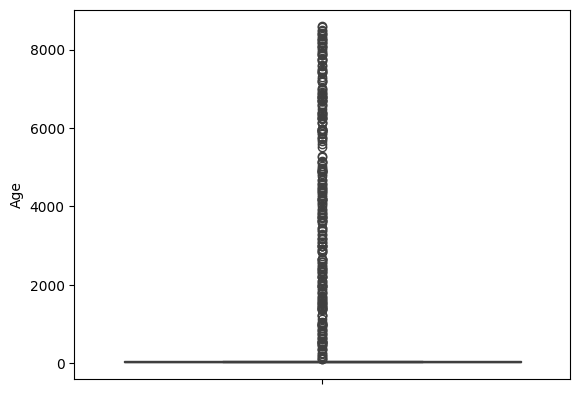

In [243]:
sns.boxplot(credit_df['Age'])

In [244]:
credit_df = credit_df[credit_df['Age'] <= 105]

In [245]:
credit_df[credit_df['Num_Bank_Accounts'] > 15].shape[0] / credit_df.shape[0]

0.013029853207982847

In [246]:
credit_df = credit_df[credit_df['Num_Bank_Accounts'] <= 15]

In [247]:
len(credit_df[credit_df['Num_Credit_Card'] > 20]) / credit_df.shape[0]

0.021975267379679145

In [248]:
credit_df = credit_df[credit_df['Num_Credit_Card'] <= 20]

In [249]:
credit_df = credit_df[credit_df['Interest_Rate'] <= 40]

In [250]:
credit_df = credit_df[credit_df['Num_of_Loan'] >= 0]

In [251]:
credit_df = credit_df[credit_df['Num_of_Loan'] <= 10]

In [252]:
credit_df = credit_df[credit_df['Num_of_Delayed_Payment'] <= 30]

In [253]:
credit_df = credit_df[credit_df['Num_Credit_Inquiries'] <= 30]

In [254]:
len(credit_df)

9782

In [255]:
credit_df = credit_df[credit_df['Delay_from_due_date'] >= 0]
credit_df = credit_df[credit_df['Num_of_Delayed_Payment'] >= 0]

In [256]:
credit_df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,9661.000000,9.661000e+03,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,8794.000000,9661.000000,9226.000000,9559.000000,9661.000000
mean,32.970086,1.983977e+05,5.414139,5.552634,14.706345,3.569299,21.346651,13.475106,5.006625,1437.454665,32.284488,215.772913,1328.671986,642.450542,403.900340,0.857675
std,10.829214,1.537373e+06,2.574923,2.067557,8.780743,2.448113,14.857655,6.202678,3.550954,1161.362182,5.089492,99.506541,8254.299956,2062.604271,215.817839,0.648880
min,14.000000,7.005930e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.340000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.940340e+04,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,2.000000,568.810000,28.141571,139.000000,29.835762,72.580320,271.641528,0.000000
50%,33.000000,3.782218e+04,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,4.000000,1171.280000,32.234646,213.000000,66.378963,132.789653,336.653420,1.000000
75%,41.000000,7.260832e+04,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,8.000000,1978.100000,36.429434,296.000000,149.617718,265.078449,471.912118,1.000000
max,102.000000,2.365819e+07,10.000000,17.000000,34.000000,9.000000,67.000000,28.000000,12.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


## 결측치 처리

In [257]:
missing_rate = credit_df.isna().mean()  # 결측값 비율 계산
missing_columns = missing_rate[missing_rate > 0]  # 비율이 0 초과인 컬럼 필터링

print(missing_columns)

Type_of_Loan               0.111479
Credit_History_Age         0.089742
Amount_invested_monthly    0.045026
Monthly_Balance            0.010558
dtype: float64


In [258]:
credit_df.head(3)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,4.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,28.0,_______,34847.84,2,4,6,1.0,Credit-Builder Loan,3,4.0,2.0,605.03,24.464031,319.0,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1
2,34.0,_______,143162.64,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",5,8.0,3.0,1303.01,28.616735,213.0,No,246.992320,168.413703,!@9#%8,1043.315978,2


In [259]:
credit_df[credit_df['Type_of_Loan'].isna()]['Num_of_Loan'].unique()

array([0.])

In [260]:
credit_df['Type_of_Loan'] = credit_df['Type_of_Loan'].fillna('No_Loan')

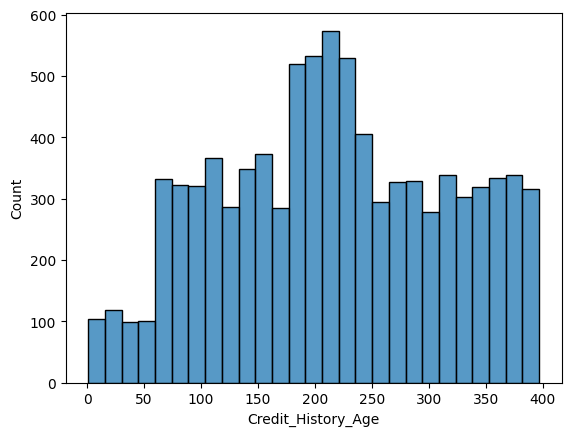

In [261]:
sns.histplot(credit_df['Credit_History_Age'])
plt.show()

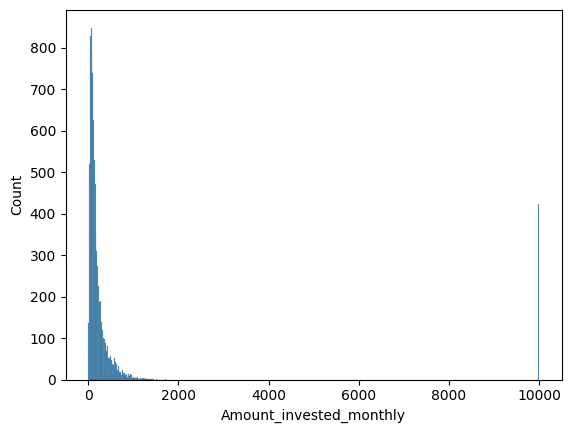

In [262]:
sns.histplot(credit_df['Amount_invested_monthly'])
plt.show()

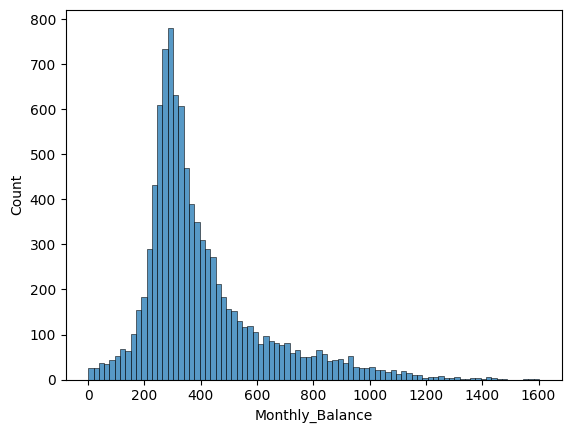

In [263]:
sns.histplot(credit_df['Monthly_Balance'])
plt.show()

In [264]:
missing_rate = credit_df.isna().mean()  # 결측값 비율 계산
missing_columns = missing_rate[missing_rate > 0]  # 비율이 0 초과인 컬럼 필터링

print(missing_columns)

Credit_History_Age         0.089742
Amount_invested_monthly    0.045026
Monthly_Balance            0.010558
dtype: float64


In [265]:
# 수치형 데이터의 중간값으로 결측값 채우기
numeric_median = credit_df.select_dtypes(include=['number']).median()
credit_df = credit_df.fillna(numeric_median)

In [266]:
missing_rate = credit_df.isna().mean()  # 결측값 비율 계산
missing_columns = missing_rate[missing_rate > 0]  # 비율이 0 초과인 컬럼 필터링

print(missing_columns)

Series([], dtype: float64)


## 텍스트 데이터 처리

In [267]:
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,4.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,28.0,_______,34847.84,2,4,6,1.0,Credit-Builder Loan,3,4.0,2.0,605.03,24.464031,319.0,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1
2,34.0,_______,143162.64,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",5,8.0,3.0,1303.01,28.616735,213.0,No,246.992320,168.413703,!@9#%8,1043.315978,2
3,54.0,Entrepreneur,30689.89,2,5,4,1.0,Not Specified,0,6.0,4.0,632.46,26.544229,207.0,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,1
6,33.0,Lawyer,131313.40,0,1,8,2.0,"Credit-Builder Loan, and Mortgage Loan",0,3.0,2.0,352.16,32.200509,367.0,NM,137.644605,378.171253,High_spent_Medium_value_payments,858.462474,2


In [268]:
credit_df['Type_of_Loan'] = credit_df['Type_of_Loan'].str.replace('and ', '')

In [269]:
type_list = list(set(credit_df['Type_of_Loan'].str.split(', ').sum()))

In [270]:
credit_df['Type_of_Loan'] = credit_df['Type_of_Loan'].str.split(', ')

In [271]:
for i in type_list:
  credit_df[i] = credit_df['Type_of_Loan'].apply(lambda x : 1 if i in x else 0)

In [272]:
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Personal Loan,Credit-Builder Loan,Home Equity Loan,Student Loan,Payday Loan,Debt Consolidation Loan,Mortgage Loan,Not Specified,No_Loan,Auto Loan
0,23.0,Scientist,19114.12,3,4,3,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan...",3,7.0,4.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2,1,1,1,0,0,0,0,0,0,1
1,28.0,_______,34847.84,2,4,6,1.0,[Credit-Builder Loan],3,4.0,2.0,605.03,24.464031,319.0,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1,0,1,0,0,0,0,0,0,0,0
2,34.0,_______,143162.64,1,5,8,3.0,"[Auto Loan, Auto Loan, Not Specified]",5,8.0,3.0,1303.01,28.616735,213.0,No,246.992320,168.413703,!@9#%8,1043.315978,2,0,0,0,0,0,0,0,1,0,1
3,54.0,Entrepreneur,30689.89,2,5,4,1.0,[Not Specified],0,6.0,4.0,632.46,26.544229,207.0,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,1,0,0,0,0,0,0,0,1,0,0
6,33.0,Lawyer,131313.40,0,1,8,2.0,"[Credit-Builder Loan, Mortgage Loan]",0,3.0,2.0,352.16,32.200509,367.0,NM,137.644605,378.171253,High_spent_Medium_value_payments,858.462474,2,0,1,0,0,0,0,1,0,0,0


In [273]:
credit_df.drop('Type_of_Loan', axis = 1, inplace=True)

In [275]:
credit_df['Occupation'].value_counts()

,count
Occupation,
_______,655
Lawyer,646
Mechanic,627
Engineer,617
Scientist,609
Architect,607
Developer,604
Teacher,603
Entrepreneur,596


In [276]:
credit_df['Occupation'] = credit_df['Occupation'].replace('_______', 'Unknown')

In [277]:
credit_df['Payment_Behaviour'] = credit_df['Payment_Behaviour'].replace('!@9#%8', 'Unknown')

## 더미 변수

In [282]:
credit_df = pd.get_dummies(credit_df, columns = credit_df.select_dtypes(include='object').columns)

In [283]:
credit_df.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Personal Loan,Credit-Builder Loan,Home Equity Loan,Student Loan,Payday Loan,Debt Consolidation Loan,Mortgage Loan,Not Specified,No_Loan,Auto Loan,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Unknown,Occupation_Writer,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unknown
0,23.0,19114.12,3,4,3,4.0,3,7.0,4.0,809.98,26.822620,265.0,49.574949,80.415295,312.494089,2,1,1,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False
1,28.0,34847.84,2,4,6,1.0,3,4.0,2.0,605.03,24.464031,319.0,18.816215,104.291825,470.690627,1,0,1,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
2,34.0,143162.64,1,5,8,3.0,5,8.0,3.0,1303.01,28.616735,213.0,246.992320,168.413703,1043.315978,2,0,0,0,0,0,0,0,1,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
3,54.0,30689.89,2,5,4,1.0,0,6.0,4.0,632.46,26.544229,207.0,16.415452,81.228859,433.604773,1,0,0,0,0,0,0,0,1,0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
6,33.0,131313.40,0,1,8,2.0,0,3.0,2.0,352.16,32.200509,367.0,137.644605,378.171253,858.462474,2,0,1,0,0,0,0,1,0,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False


In [284]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9661 entries, 0 to 12498
Data columns (total 52 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 9661 non-null   float64
 1   Annual_Income                                       9661 non-null   float64
 2   Num_Bank_Accounts                                   9661 non-null   int64  
 3   Num_Credit_Card                                     9661 non-null   int64  
 4   Interest_Rate                                       9661 non-null   int64  
 5   Num_of_Loan                                         9661 non-null   float64
 6   Delay_from_due_date                                 9661 non-null   int64  
 7   Num_of_Delayed_Payment                              9661 non-null   float64
 8   Num_Credit_Inquiries                                9661 non-null   float64
 9   O

## 모델링

In [285]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(credit_df.drop('Credit_Score', axis = 1), credit_df['Credit_Score'], test_size=0.25, random_state=100)

In [206]:
!pip install lightgbm

In [286]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [287]:
base_model = LGBMClassifier(random_state=100)
base_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 7245, number of used features: 51
[LightGBM] [Info] Start training from score -1.239804
[LightGBM] [Info] Start training from score -0.575195
[LightGBM] [Info] Start training from score -1.910786


LGBMClassifier(random_state=100)

In [288]:
pred1 = base_model.predict(X_test)
print(accuracy_score(y_test, pred1))

0.7363410596026491


In [289]:
print(confusion_matrix(y_test, pred1))

[[ 516  170   36]
 [ 163 1036  123]
 [   7  138  227]]


In [290]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       722
           1       0.77      0.78      0.78      1322
           2       0.59      0.61      0.60       372

    accuracy                           0.74      2416
   macro avg       0.70      0.70      0.70      2416
weighted avg       0.74      0.74      0.74      2416



In [292]:
proba1 = base_model.predict_proba(X_test)

In [293]:
proba1

array([[1.24961126e-01, 8.28303695e-01, 4.67351788e-02],
       [3.78914627e-01, 6.20630516e-01, 4.54856490e-04],
       [6.65814223e-01, 3.33991635e-01, 1.94142245e-04],
       ...,
       [7.27858771e-01, 2.71971844e-01, 1.69385460e-04],
       [1.26486967e-01, 3.41079419e-01, 5.32433614e-01],
       [8.07397950e-01, 1.92355843e-01, 2.46207167e-04]])

In [296]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, proba1, multi_class='ovr') # ovo : 1 대 1, ovr : 1대 나머지

0.9039833638520278

## 그리드 서치

In [297]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [299]:
params = {'n_estimators':[100, 300, 500, 100],
          'max_depth':[-1, 10, 30, 50]}

In [300]:
lgbm = LGBMClassifier(random_state=100)

In [301]:
grid_lgbm = GridSearchCV(lgbm, param_grid=params, cv=3)

In [302]:
grid_lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2060
[LightGBM] [Info] Number of data points in the train set: 4830, number of used features: 51
[LightGBM] [Info] Start training from score -1.239804
[LightGBM] [Info] Start training from score -0.575318
[LightGBM] [Info] Start training from score -1.910319
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2052
[LightGBM] [Info] Number of data points in the train set: 4830, nu

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 7245, number of used features: 51
[LightGBM] [Info] Start training from score -1.239804
[LightGBM] [Info] Start training from score -0.575195
[LightGBM] [Info] Start training from score -1.910786


GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=100),
             param_grid={'max_depth': [-1, 10, 30, 50],
                         'n_estimators': [100, 300, 500, 100]})

In [303]:
grid_lgbm.best_params_

{'max_depth': -1, 'n_estimators': 100}

In [304]:
proba2 = grid_lgbm.predict_proba(X_test)
roc_auc_score(y_test, proba2, multi_class='ovr')

0.9039833638520278

In [305]:
params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [-1, 10, 30, 50],
    'num_leaves': [5, 10, 20, 50],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}

In [307]:
rand_lgbm = RandomizedSearchCV(lgbm, params, cv=3, n_iter=30, random_state=100)

In [308]:
rand_lgbm.fit(X_train, y_train)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 7245, number of used features: 51
[LightGBM] [Info] Start training from score -1.239804
[LightGBM] [Info] Start training from score -0.575195
[LightGBM] [Info] Start training from score -1.910786


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=100), n_iter=30,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1],
                                        'max_depth': [-1, 10, 30, 50],
                                        'n_estimators': [100, 300, 500],
                                        'num_leaves': [5, 10, 20, 50]},
                   random_state=100)

In [309]:
rand_lgbm.best_params_

{'num_leaves': 5, 'n_estimators': 500, 'max_depth': 30, 'learning_rate': 0.01}

In [310]:
proba3 = rand_lgbm.predict_proba(X_test)
roc_auc_score(y_test, proba3, multi_class='ovr')

0.9083494401254087